<span style="color:#51a2d6; font-size:24px; font-weight:700"> Cluster Validation

One of the big issues with clustering methods is that they will return clusters 
even if the data does not contain any clusters. 
Thus, it's important to assess clustering tendency before the analysis and also 
validate the quality of the results after clustering.

In general clustering validation statistics can be grouped into following 4 classes. 

**Relative clustering validation**: 
This evaluates the clustering structure by varying different parameter values for the same algorithm 
(e.g. varying the number of clusters k). 
It’s generally used for determining the optimal number of clusters.

**External clustering validation**: 
This method compares the results of a cluster analysis to an externally known result, 
such as externally provided class labels. 
Since we know the “true” cluster number in advance, 
this approach is mainly used for selecting the right clustering algorithm for a specific dataset.

**Internal clustering validation**: 
This method uses internal information of the clustering process to evaluate the goodness 
of a clustering structure without reference to external information. 
It can be also used for estimating the number of clusters and the appropriate 
clustering algorithm without any external data.

**Clustering stability validation**: 
This method is a special version of internal validation. 
It evaluates the consistency of a clustering result by comparing it with the clusters 
obtained after each column is removed, one at a time.

We will be using following list of packages for clusters evaluation

* **cluster:** For analyzing cluster silhouettes
* **factoextra:** For visualizing clusters using ggplot2 plotting system
* **fpc:** For computing clustering validation statistics
* **NbClust:** For determining the optimal number of clusters in the data


---

<span style="color:#ce7721; font-size:20px; font-weight:700"> Data Preparation</span>

We will load a wholesales dataset from `/dsa/data/all_datasets/wholesale/Wholesale_customers_data.csv`.

In [1]:
customers_data = read.csv("/dsa/data/all_datasets/wholesale/Wholesale_customers_data.csv",sep=',',header=TRUE)
head(customers_data)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,3,12669,9656,7561,214,2674,1338
2,2,3,7057,9810,9568,1762,3293,1776
3,2,3,6353,8808,7684,2405,3516,7844
4,1,3,13265,1196,4221,6404,507,1788
5,2,3,22615,5410,7198,3915,1777,5185
6,2,3,9413,8259,5126,666,1795,1451


<span style="color:#ce7721; font-size:20px; font-weight:700"> Determine the optimal number of clusters

The NbClust package will compute the optimal number of clusters for your data with a single function call.

In [2]:
customers_data = customers_data[,names(customers_data)!=('Region')]
customers_scaled = scale(customers_data)
# head(customers_scaled)
# table(customers_data$Region)
# attach(iris)
# iris_scaled = iris[,-5]

**Nbclust:** 
This package provides 30 indices for determining the number of clusters and proposes to the user 
the best clustering scheme from the different results obtained by varying all combinations of number of clusters, 
distance measures, and clustering methods. 

For more info refer to the documentation...

In [3]:
library(NbClust)

In [4]:
help(NbClust)

Warning message in pf(beale, pp, df2):
“NaNs produced”


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


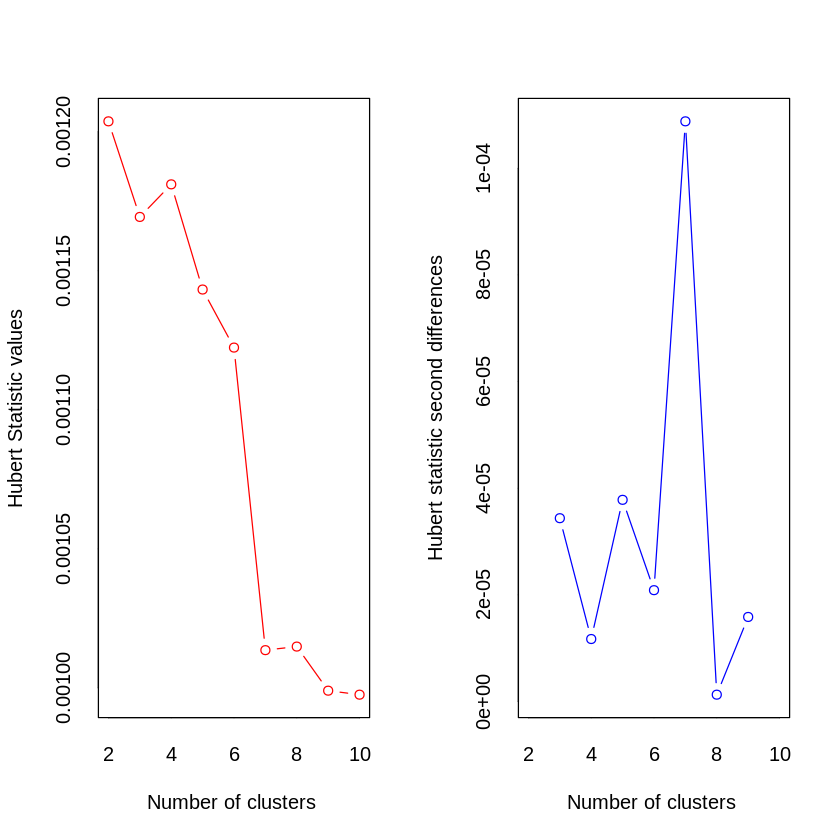

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 8 proposed 2 as the best number of clusters 
* 5 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 3 proposed 6 as the best number of clusters 
* 6 proposed 7 as the best number of clusters 
* 1 proposed 9 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


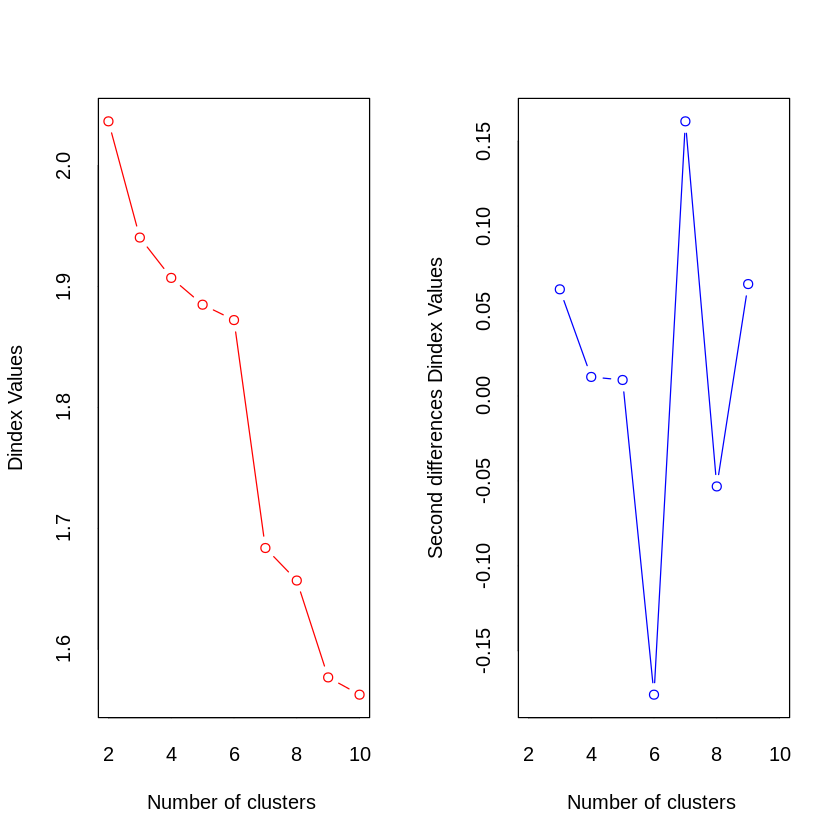

In [5]:
# Compute the number of clusters

nb <- NbClust(customers_scaled, distance = "euclidean", min.nc = 2,
        max.nc = 10, method = "complete", index ="all")

**So, NBclust is suggesting that we form 2 clusters.** 

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message in if (class(best_nc) == "numeric") print(best_nc) else if (class(best_nc) == :
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(best_nc) == "matrix") .viz_NbClust(x, print.summary, :
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(best_nc) == "numeric") print(best_nc) else if (class(best_nc) == :
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(best_nc) == "matrix") {:
“the condition has length > 1 and only the first element will be used”


Among all indices: 
* 2 proposed  0 as the best number of clusters
* 8 proposed  2 as the best number of clusters
* 5 proposed  3 as the best number of clusters
* 1 proposed  4 as the best number of clusters
* 3 proposed  6 as the best number of clusters
* 6 proposed  7 as the best number of clusters
* 1 proposed  9 as the best number of clusters

Conclusion
* According to the majority rule, the best number of clusters is  2 .



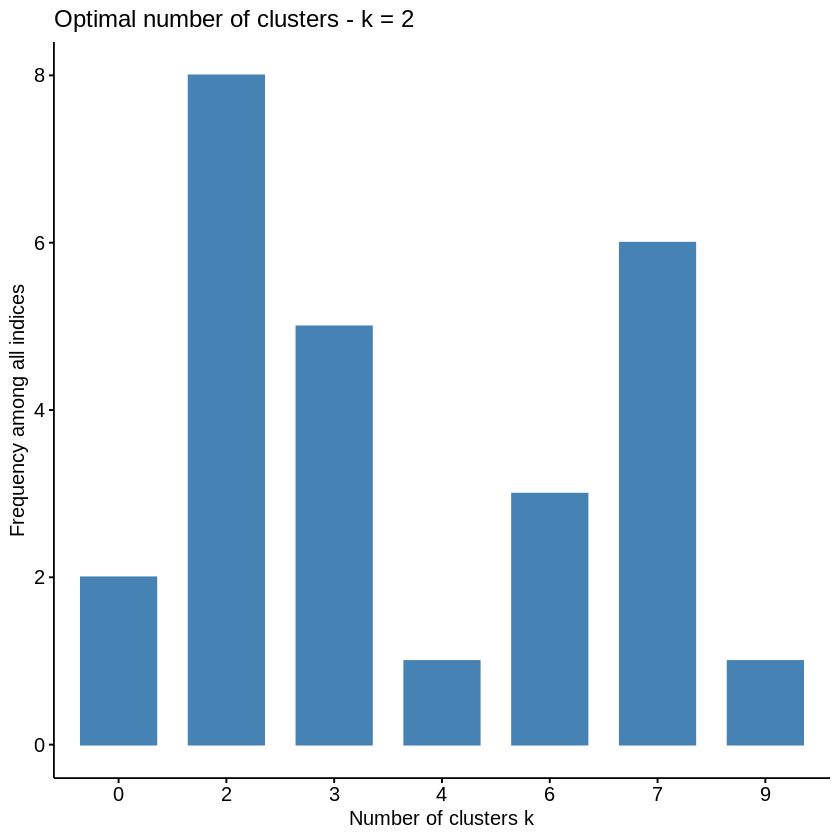

In [6]:
# Visualize the result
library(factoextra)
fviz_nbclust(nb)

<span style="color:#ce7721; font-size:20px; font-weight:700"> Clustering analysis

Use `eclust()` function in `factoextra` package. 
`eclust()` stands for enhanced clustering. 
It simplifies the workflow of clustering analysis.

In [7]:
# K-means clustering
km.res <- eclust(customers_scaled, "kmeans", k = 2,nstart = 25, graph = FALSE)
# k-means group number of each observation
table(km.res$cluster)


  1   2 
305 135 

Warning message:
“argument frame is deprecated; please use ellipse instead.”
Warning message:
“argument frame.type is deprecated; please use ellipse.type instead.”


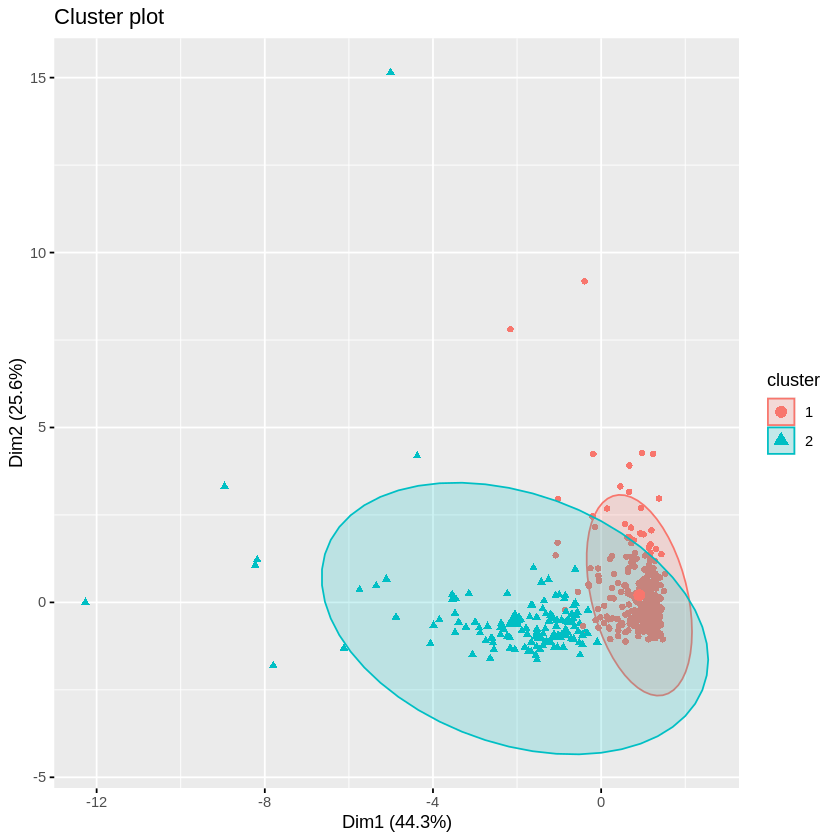

In [8]:
# Visualize k-means clusters
fviz_cluster(km.res, geom = "point", frame.type = "norm")

Repeat the kmeans clustering with K=3...

In [9]:
# K-means clustering
km.res1 <- eclust(customers_scaled, "kmeans", k = 3,nstart = 25, graph = FALSE)
# k-means group number of each observation
table(km.res1$cluster)


  1   2   3 
296  14 130 

Warning message:
“argument frame is deprecated; please use ellipse instead.”
Warning message:
“argument frame.type is deprecated; please use ellipse.type instead.”


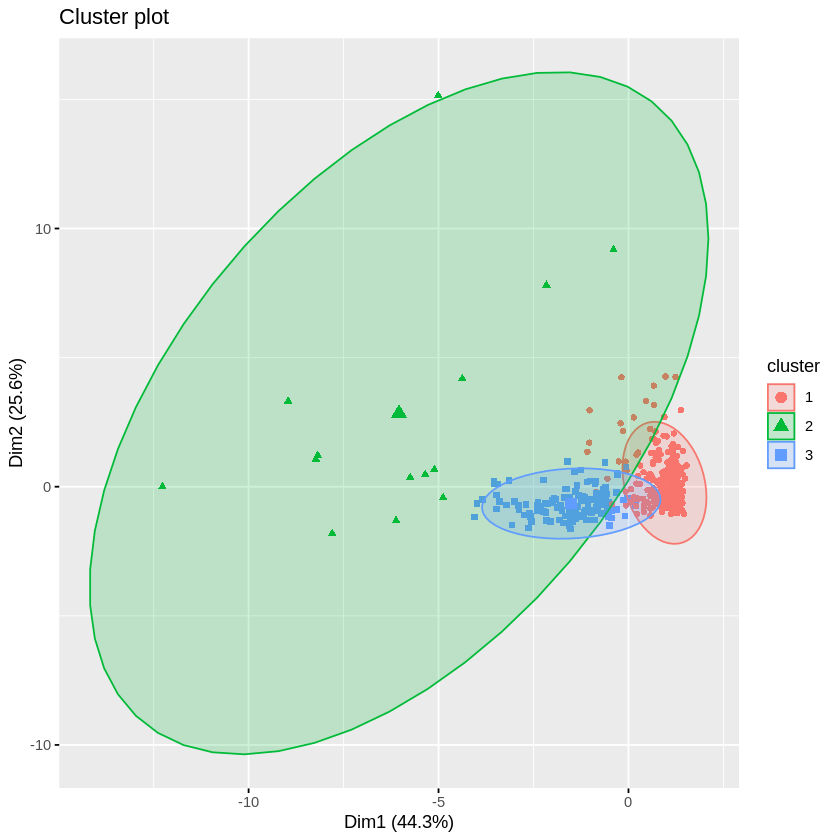

In [10]:
# Visualize k-means clusters
fviz_cluster(km.res1, geom = "point", frame.type = "norm")

<span style="color:#ce7721; font-size:20px; font-weight:700"> Hierarchical Clustering Results

In [11]:
# Enhanced hierarchical clustering
res.hc <- eclust(customers_scaled, "hclust", k = 3, method = "complete", graph = FALSE) 
table(res.hc$cluster)


  1   2   3 
117 298  25 

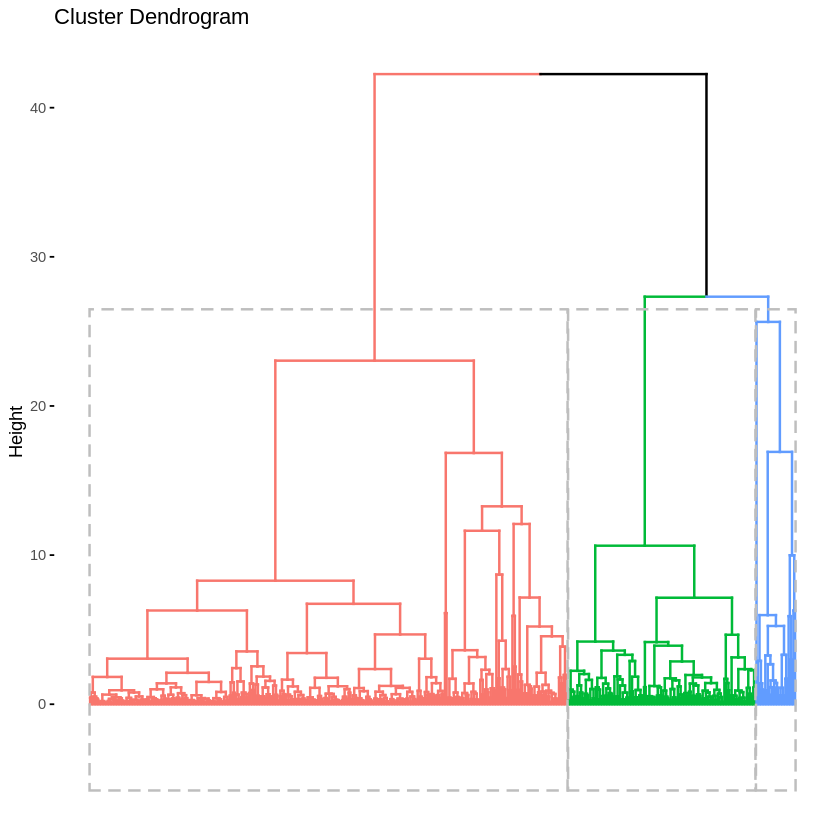

In [12]:
# Dendrogram - THIS TAKES TIME TO PLOT 

fviz_dend(res.hc, rect = TRUE, show_labels = FALSE)

<span style="color:#1576b2; font-size:18px; font-weight:700"> Internal clustering validation measures

The goal of clustering algorithms is to split the dataset into clusters of objects, such that:

* the objects in the same cluster are as similar as possible and
* the objects in different clusters are highly distinct

In other words, we want the average distance within cluster to be as small as possible
and the average distance between clusters to be as large as possible.

The following measures help us evaluate the clusters internally:

**Compactness:** 
measures how close are the objects within the same cluster. 
A lower within-cluster variation is an indicator of a good compactness (i.e., a good clustering). 
The different indices for evaluating the compactness of clusters are based on distance 
measures such as the cluster-wise within average/median distances between observations.

**Separation:** 
measures how well-separated a cluster is from other clusters.
The indices used as separation measures include distances between cluster centers and the 
pairwise minimum distances between objects in different clusters.

**Connectivity:** 
corresponds to what extent items are placed in the same cluster as their nearest neighbors in the data space. 
The connectivity has a value between 0 and infinity and should be minimized.

<span style="color:#1576b2; font-size:16px; font-weight:700"> 1. Silhouette analysis

Silhouette analysis measures how well an observation is clustered and it estimates 
the average distance between clusters. 
The silhouette plot displays a measure of how close each point in one cluster is to points 
in the neighboring clusters. 

**Details:** 
For each observation $i$, the silhouette width $s(i)$ is defined as follows: 
Put $a(i)$ = average dissimilarity between i and all other points of the cluster to which i 
belongs (if i is the only observation in its cluster, $s(i):= 0$ without further calculations). 
For all other clusters C, put $d(i, C)$ = average dissimilarity of i to all observations of C. 
The smallest of these $d(i, C)$ is $b(i) := min_c d(i, C)$, 
and can be seen as the dissimilarity between i and its “neighbor” cluster, i.e., 
the nearest one to which it does not belong. Finally,

$$s(i) := \frac{b(i) - a(i)}{max(a(i), b(i))}$$


The silhouette coefficient of observations can be computed using the function silhouette() in cluster package. 

$$silhouette(x, dist, ...)$$ where



_x_: an integer vector containing the cluster assignment of observations

_dist_: a dissimilarity object created by the function dist()

The function silhouette() returns an object, of class silhouette which is an $n×3$ matrix with attributes. 
For each observation i, sil[i,] contains

* The cluster number of each observation **i**
* The neighbor cluster of **i** (the cluster, not containing **i**, for which the average dissimilarity between its observations and **i** is minimal)
* The silhouette width $s_i$ of each observation


The R code below computes silhouette analysis and a plot is generated using R base plot:

In [13]:
# Silhouette coefficient of observations
library(cluster)
sil <- silhouette(km.res1$cluster, dist(customers_scaled))
head(sil[, 1:3], 10)

cluster,neighbor,sil_width
3,1,0.4154702
3,1,0.4818120
3,1,0.2460586
1,3,0.5401344
3,1,0.1818425
3,1,0.3506668
3,1,0.3441102
3,1,0.4302070
1,3,0.5042180
3,1,0.5633578


Silhouette width $s(i)$: 
Observations with a large $s(i)$ (almost 1) are very well clustered, a small $s(i)$ (around 0) 
means that the observation lies between two clusters, 
and observations with a negative $s(i)$ are probably placed in the wrong cluster.

  cluster size ave.sil.width
1       1  296          0.47
2       2   14         -0.10
3       3  130          0.43


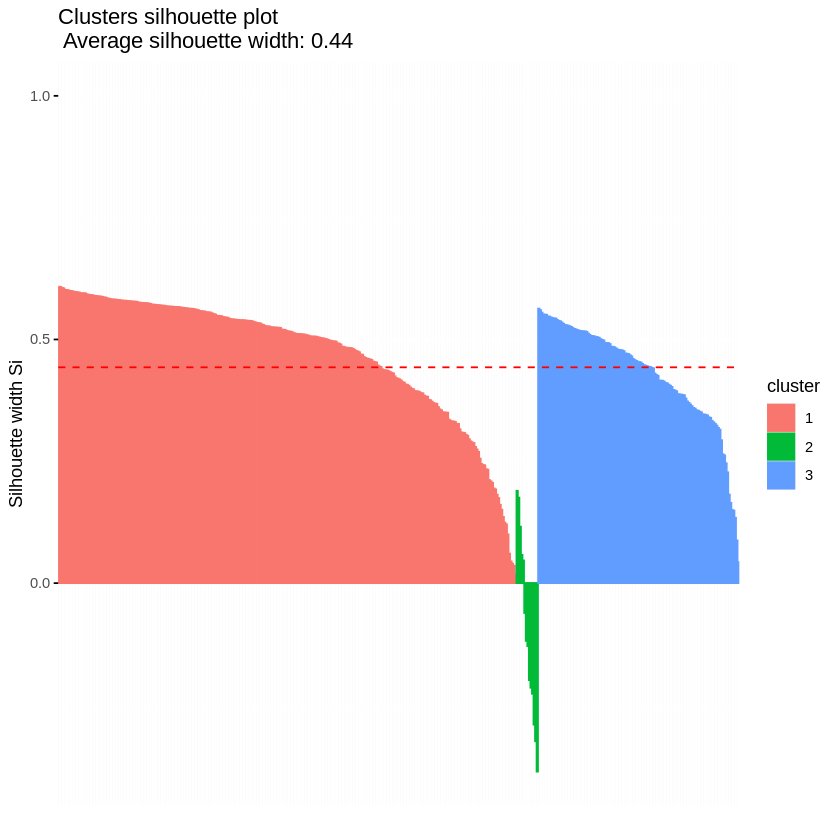

In [14]:
library(factoextra)
fviz_silhouette(sil)

The summary of the silhouette analysis can be computed using the function `summary.silhouette()` as follows.

In [15]:
# Summary of silhouette analysis

summary(sil)

Silhouette of 440 units in 3 clusters from silhouette.default(x = km.res1$cluster, dist = dist(customers_scaled)) :
 Cluster sizes and average silhouette widths:
        296          14         130 
 0.47417420 -0.09759667  0.42995081 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.3868  0.3862  0.4967  0.4429  0.5484  0.6082 

##### Samples with a negative silhouette coefficient:

In [16]:
# Silhouette widths of each observation
table(sil[, 1:3]<0)


FALSE  TRUE 
 1311     9 

There are quite a few samples that have a negative silhouette coefficient in k-means clustering. 
This means that they are not in the right cluster.

We can find the name of these samples and determine the clusters they are closer (neighbor cluster) to, as follows:

In [17]:
# Objects with negative silhouette
neg_sil_index <- which(sil[, 'sil_width'] < 0)
sil[neg_sil_index, , drop = FALSE]

cluster,neighbor,sil_width
2,3,-0.19913359
2,3,-0.38679501
2,3,-0.22698081
2,3,-0.29038661
2,1,-0.11861075
2,3,-0.21465634
2,3,-0.32454977
2,1,-0.12941722
2,3,-0.06132122


<span style="color:#1576b2; font-size:16px; font-weight:700"> 2. Dunn index

The Dunn index is another internal clustering validation measure which can be computed as follows,

* For each cluster, compute the distance between each of the objects in the cluster and the objects in the other clusters
* Use the minimum of this pairwise distance as the inter-cluster separation (min.separation)
* For each cluster, compute the distance between the objects in the same cluster.
* Use the maximal intra-cluster distance (i.e maximum diameter) as the intra-cluster compactness
* Calculate Dunn index (D) as follows:

$$D=\frac{min.separation}{max.diameter}$$



The function `cluster.stats()` in fpc package and the `NbClust()` in NbClust 
package are used to compute Dunn index and many other indices.
It returns a list containing many components useful for analyzing the intrinsic characteristics of a clustering:

* cluster.number: number of clusters
* cluster.size: vector containing the number of points in each cluster
* average.distance, median.distance: vector containing the cluster-wise within average/median distances
* average.between: average distance between clusters. We want it to be as large as possible
* average.within: average distance within clusters. We want it to be as small as possible
* clus.avg.silwidths: vector of cluster average silhouette widths. Recall that, the silhouette width is also an estimate of the * average distance between clusters. Its value is between 1 and -1 with a value of 1 indicating a very good cluster.
* within.cluster.ss: a generalization of the within clusters sum of squares (k-means objective function), which is obtained if d is a Euclidean distance matrix.
* dunn, dunn2: Dunn index
* corrected.rand, vi: Two indexes to assess the similarity of two clusters: the corrected Rand index and Meila’s VI.

In [19]:
library(fpc)

# Compute pairwise-distance matrices
dd <- dist(customers_scaled, method ="euclidean")
# Statistics for k-means clustering
cluster.stats(dd, km.res1$cluster)

0.000000,4.376986,1.207934
4.376986,0.000000,1.471113
1.207934,1.471113,0.000000
0.000000,9.933638,3.390291
9.933638,0.000000,8.586532
3.390291,8.586532,0.000000


Read the documentation for cluster.stats() for an explanation of all the available indices.

In [20]:
help(cluster.stats)





# Save your notebook!